<font color ='red'><h4><b>Credit Risk Scoring Project</h4><font>


We want to build a model that for each customer is going to calculate the credit risk based on certain conditions and then will tell use whether the customer will default or will pay the loan back. so a binary classification problem.<br>

Decision tree algorithm is like a rule based algorithm that if this then this and we will learn that how decision tree algorithm comes to know about these routes/rules <br>

We will see what happens if we put different or many more trees together we get the <font color = 'orange'> Random Forest Model</font> <br>

How to combine multiple trees together called <font color = 'orange'> Gradient Boosting</font> using a library called <font color = 'orange'>XGBoost</font> <br>

And finally selecting the best model.


<font color = 'red'><h4> <b>Data Cleaning and Preparation</h4></font>

🥽 Download the data from the given link.<br>
🥽Reformat categorical columns (status, home, marital, records, and job) by mapping with appropriate values.<br>
🥽Replace the maximum value of income, assests, and debt columns with NaNs.<br>
🥽Replace the NaNs in the dataframe with 0 (will be shown in the next lesson).<br>
🥽Extract only those rows in the column status who are either ok or default as value.<br>
🥽Split the data in a two-step process which finally leads to the distribution of 60% train, 20% validation, and 20% test sets with random seed to 11.<br>
🥽Prepare target variable status by converting it from categorical to binary, where 0 represents ok and 1 represents default.<br>
🥽Finally delete the target variable from the train/val/test dataframe.<br>

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'

df =pd.read_csv(data)

df.head()

Status  Seniority  Home  Time  Age  Marital  Records  Job  Expenses  \
0       1          9     1    60   30        2        1    3        73   
1       1         17     1    60   58        3        1    1        48   
2       2         10     2    36   46        2        2    3        90   
3       1          0     1    60   24        1        1    1        63   
4       1          0     1    36   26        1        1    1        46   

   Income  Assets  Debt  Amount  Price  
0     129       0     0     800    846  
1     131       0     0    1000   1658  
2     200    3000     0    2000   2985  
3     182    2500     0     900   1325  
4     107       0     0     310    910

In [3]:
df.columns = df.columns.str.lower()

In [4]:
df.head()

status  seniority  home  time  age  marital  records  job  expenses  \
0       1          9     1    60   30        2        1    3        73   
1       1         17     1    60   58        3        1    1        48   
2       2         10     2    36   46        2        2    3        90   
3       1          0     1    60   24        1        1    1        63   
4       1          0     1    36   26        1        1    1        46   

   income  assets  debt  amount  price  
0     129       0     0     800    846  
1     131       0     0    1000   1658  
2     200    3000     0    2000   2985  
3     182    2500     0     900   1325  
4     107       0     0     310    910

In [5]:
#The categorical variable are coded as numerical and that is not what we want to convert it into useful information so it is easier to see what is going on.
#For that we can use the map method in which we can pass a dictionary indicating what value represents what.

status_values = {
    1:'ok',
    2:'default',
    0:'unk'  #unknown
}

df.status = df.status.map(status_values)

In [6]:
df.head()

status  seniority  home  time  age  marital  records  job  expenses  \
0       ok          9     1    60   30        2        1    3        73   
1       ok         17     1    60   58        3        1    1        48   
2  default         10     2    36   46        2        2    3        90   
3       ok          0     1    60   24        1        1    1        63   
4       ok          0     1    36   26        1        1    1        46   

   income  assets  debt  amount  price  
0     129       0     0     800    846  
1     131       0     0    1000   1658  
2     200    3000     0    2000   2985  
3     182    2500     0     900   1325  
4     107       0     0     310    910

In [7]:
#similarly we can do the same for other columns as well

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)


In [8]:
df.head()

status  seniority   home  time  age  marital records        job  expenses  \
0       ok          9   rent    60   30  married      no  freelance        73   
1       ok         17   rent    60   58    widow      no      fixed        48   
2  default         10  owner    36   46  married     yes  freelance        90   
3       ok          0   rent    60   24   single      no      fixed        63   
4       ok          0   rent    36   26   single      no      fixed        46   

   income  assets  debt  amount  price  
0     129       0     0     800    846  
1     131       0     0    1000   1658  
2     200    3000     0    2000   2985  
3     182    2500     0     900   1325  
4     107       0     0     310    910

In [9]:
# now lets look at the numerical columns

df.describe().round()

seniority    time     age  expenses      income      assets  \
count     4455.0  4455.0  4455.0    4455.0      4455.0      4455.0   
mean         8.0    46.0    37.0      56.0    763317.0   1060341.0   
std          8.0    15.0    11.0      20.0   8703625.0  10217569.0   
min          0.0     6.0    18.0      35.0         0.0         0.0   
25%          2.0    36.0    28.0      35.0        80.0         0.0   
50%          5.0    48.0    36.0      51.0       120.0      3500.0   
75%         12.0    60.0    45.0      72.0       166.0      6000.0   
max         48.0    72.0    68.0     180.0  99999999.0  99999999.0   

             debt  amount    price  
count      4455.0  4455.0   4455.0  
mean     404382.0  1039.0   1463.0  
std     6344253.0   475.0    628.0  
min           0.0   100.0    105.0  
25%           0.0   700.0   1118.0  
50%           0.0  1000.0   1400.0  
75%           0.0  1300.0   1692.0  
max    99999999.0  5000.0  11140.0

In [10]:
# since the income assets and debt has the arbitrary number 99999999 as the max value that is absurd so we will replace it with nan 
# to achiever that we can use replace method with just works like map but only for one value

for c in ['assets','income','debt']:
    df[c]=df[c].replace(to_replace=df[c].max(),value=np.nan)
    
#printing out the new max values to check if have properly replaced the fake max values.
for c in ['assets','income','debt']:
    print(df[c].max())

300000.0
959.0
30000.0


In [11]:
# we also saw that the status column has unknown value in it and that is of no use to us we only need ok and default so lets remove that row

df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [12]:
df = df[df.status!='unk'].reset_index(drop =True)

In [13]:
df

status  seniority   home  time  age  marital records        job  \
0          ok          9   rent    60   30  married      no  freelance   
1          ok         17   rent    60   58    widow      no      fixed   
2     default         10  owner    36   46  married     yes  freelance   
3          ok          0   rent    60   24   single      no      fixed   
4          ok          0   rent    36   26   single      no      fixed   
...       ...        ...    ...   ...  ...      ...     ...        ...   
4449  default          1   rent    60   39  married      no      fixed   
4450       ok         22  owner    60   46  married      no      fixed   
4451  default          0  owner    24   37  married      no    partime   
4452       ok          0   rent    48   23   single      no  freelance   
4453       ok          5  owner    60   32  married      no  freelance   

      expenses  income  assets    debt  amount  price  
0           73   129.0     0.0     0.0     800    846  
1           48   131.0     0.0     0.0    1000   1658  
2           90   200.0  3000.0     0.0    2000   2985  
3           63   182.0  2500.0     0.0     900   1325  
4           46   107.0     0.0     0.0     310    910  
...        ...     ...     ...     ...     ...    ...  
4449        69    92.0     0.0     0.0     900   1020  
4450        60    75.0  3000.0   600.0     950   1263  
4451        60    90.0  3500.0     0.0     500    963  
4452        49   140.0     0.0     0.0     550    550  
4453        60   140.0  4000.0  1000.0    1350   1650  

[4454 rows x 14 columns]

In [14]:
# lets split the data frame in train test and validation
from sklearn.model_selection import train_test_split

df_full_train,df_test =train_test_split(df,test_size=0.2,random_state=11)
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=11)

In [15]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [16]:
#Lets convert the status column to back to numerics but not the previous ones i.e 1,2 it should be 0,1

y_train = (df_train.status=='default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [17]:
# now let remove the target variable from the train validation and test dataset

del df_train['status']
del df_val['status']
del df_test['status']

In [18]:
df_train

seniority     home  time  age  marital records        job  expenses  \
0            10    owner    36   36  married      no  freelance        75   
1             6  parents    48   32   single     yes      fixed        35   
2             1  parents    48   40  married      no      fixed        75   
3             1  parents    48   23   single      no    partime        35   
4             5    owner    36   46  married      no  freelance        60   
...         ...      ...   ...  ...      ...     ...        ...       ...   
2667         18  private    36   45  married      no      fixed        45   
2668          7  private    60   29  married      no      fixed        60   
2669          1  parents    24   19   single      no      fixed        35   
2670         15    owner    48   43  married      no  freelance        60   
2671         12    owner    48   27  married     yes      fixed        45   

      income   assets    debt  amount  price  
0        0.0  10000.0     0.0    1000   1400  
1       85.0      0.0     0.0    1100   1330  
2      121.0      0.0     0.0    1320   1600  
3       72.0      0.0     0.0    1078   1079  
4      100.0   4000.0     0.0    1100   1897  
...      ...      ...     ...     ...    ...  
2667   220.0  20000.0     0.0     800   1600  
2668    51.0   3500.0   500.0    1000   1290  
2669    28.0      0.0     0.0     400    600  
2670   100.0  18000.0     0.0    2500   2976  
2671   110.0   5000.0  1300.0     450   1636  

[2672 rows x 13 columns]

<font color = 'red'><h4><b>Decision Tree </b></h4></font> <br>

🐳 How a decision tree looks like <br>
🐳 Training a decision tree<br>
🐳 Overfitting  <br>
🐳 Controlling the size of the tree <br>

Decision tree is simple rule based algorithm just like this image below <br>
<br>
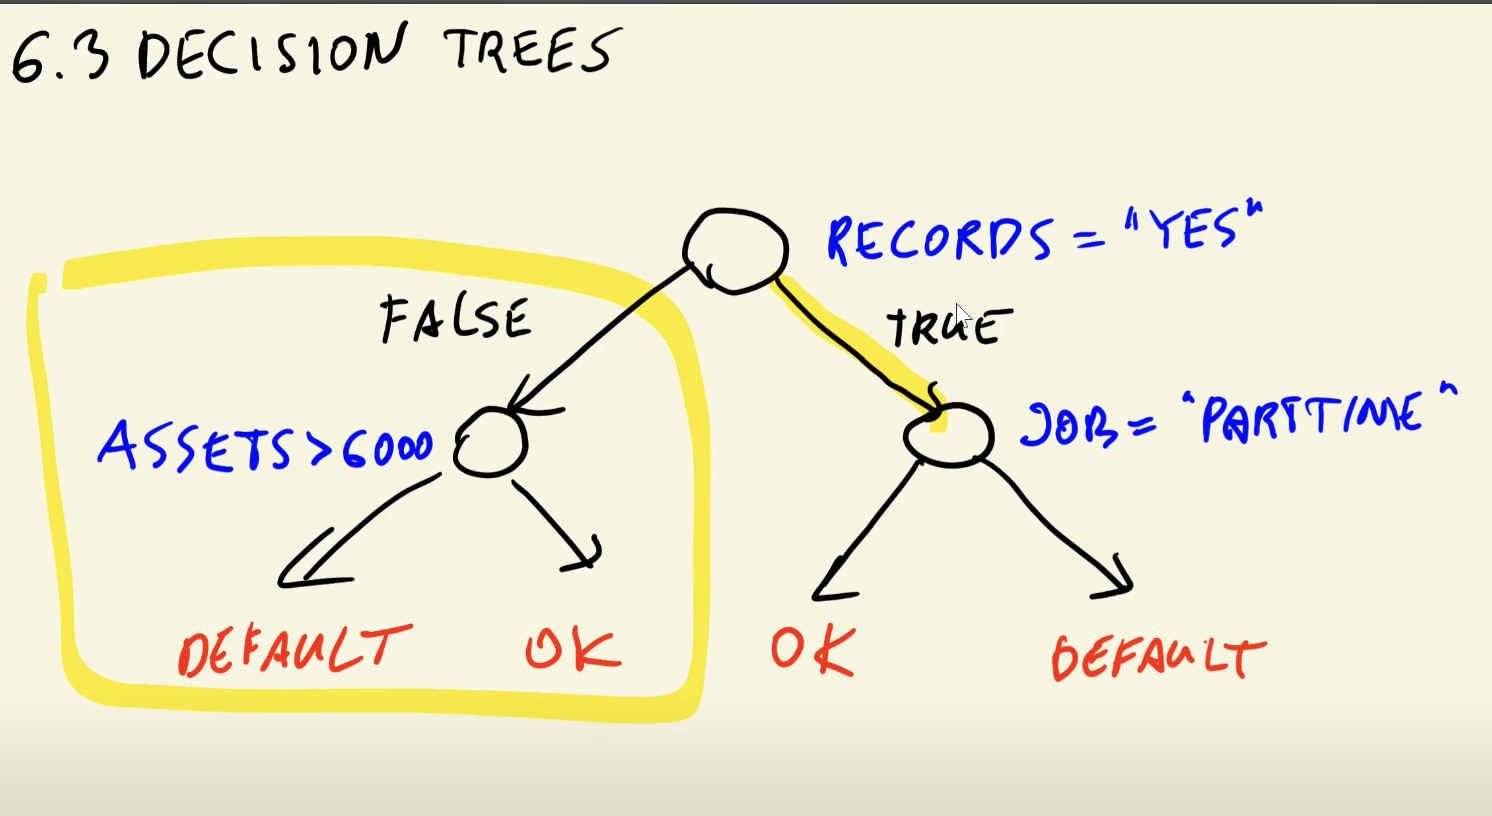 <br>

We can implement the same using the if else rule like below


In [19]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else :
            return 'ok'
    else:
        if client['assets']>6000:
            return 'ok'
        else:
            return 'default'
    endif

In [20]:
xi = df_train.iloc[0].to_dict()

In [21]:
assess_risk(xi)

'ok'

Here we encoded these rules manually but these rules can be learned from the data and we can do that with the help of scikit learn


In [22]:
from sklearn.tree import DecisionTreeClassifier # decision tree can also be used to solve regression problems but here we are using it for binary classification.
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score


In [23]:
train_dicts  = df_train.fillna(0).to_dict(orient = 'records') # we are replacing the na's with zero and converting to dict

dv =DictVectorizer(sparse = False)

x_train = dv.fit_transform(train_dicts)

In [24]:
dv.get_feature_names_out() # these are the features, all the numerical features have been kept intact and the categorical variables have been converted to new columns accordingly

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [25]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
val_dicts = df_val.fillna(0).to_dict(orient = 'records')

x_val =dv.transform(val_dicts)

In [27]:
y_pred = dt.predict_proba(x_val)[:,1] # why this slicing is that it return two column but we only need the probability of customer belonging to the positive class


In [28]:
# now lets calculate the area under the Roc curve

roc_auc_score(y_val,y_pred)

# we see that it is not that impressive

np.float64(0.6594384974934006)

In [29]:
#Lets check the Area under roc curve for our training data set

y_pred = dt.predict_proba(x_train)[:,1]
roc_auc_score(y_train,y_pred)

# it comes out to be 1 on the training data set

np.float64(1.0)

on our validation dataset it comes out to be around 0.65 while on the training dataset it comes out to be 1, and this is called <font color = 'orange'><b>Overfitting</b></font> <br>
<font color = 'orange'><b>Overfitting</b></font> is when our model simply memorizes the data in such a way that if it sees a new example it does not know what to do with it,so it fails to generalize <br>

Our decision tree runs very deep and memorizes the data and hence the depth is unrestircted<br>
<br>
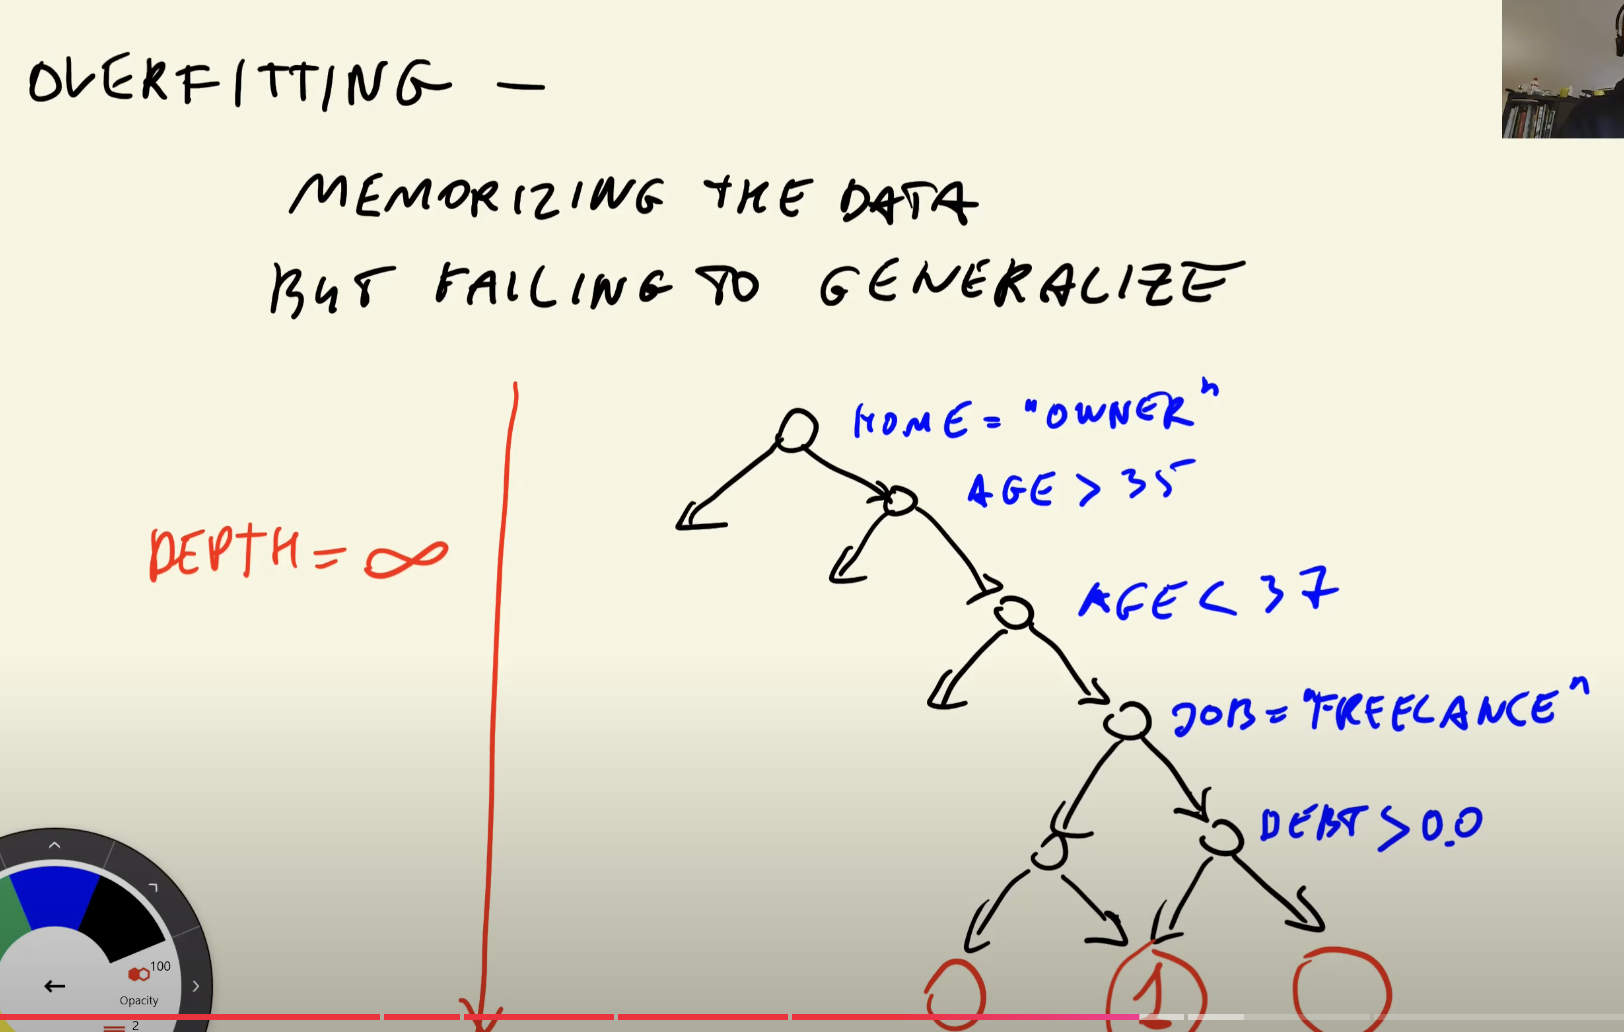<br><br>

whereas if lets say the depth is 3 then it will learn rules that are less specific<br><br>
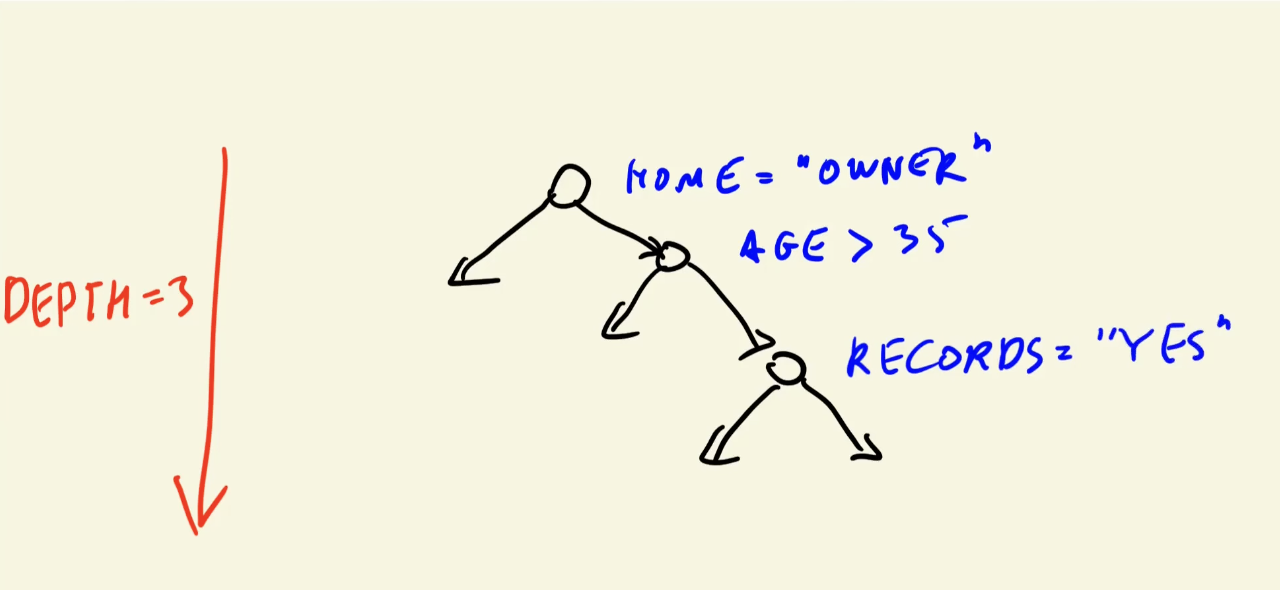<br><br>

Now lets retrain the model with max depth as 3



In [30]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [31]:
y_pred = dt.predict_proba(x_train)[:,1]
auc = roc_auc_score(y_train,y_pred)

print('train auc : ',auc)


y_pred = dt.predict_proba(x_val)[:,1]
auc = roc_auc_score(y_val,y_pred)

print('validation auc : ',auc)

# Hence we can see that now the performance of our model on validation data has been improved by 8%

train auc :  0.7761016984958594
validation auc :  0.7389079944782155


We can also set the depth as 1 but then the performance becomes dull/bad
and it is actually not a tress and is called <font color = 'Orange'> Decision Stump</font> <br><br>

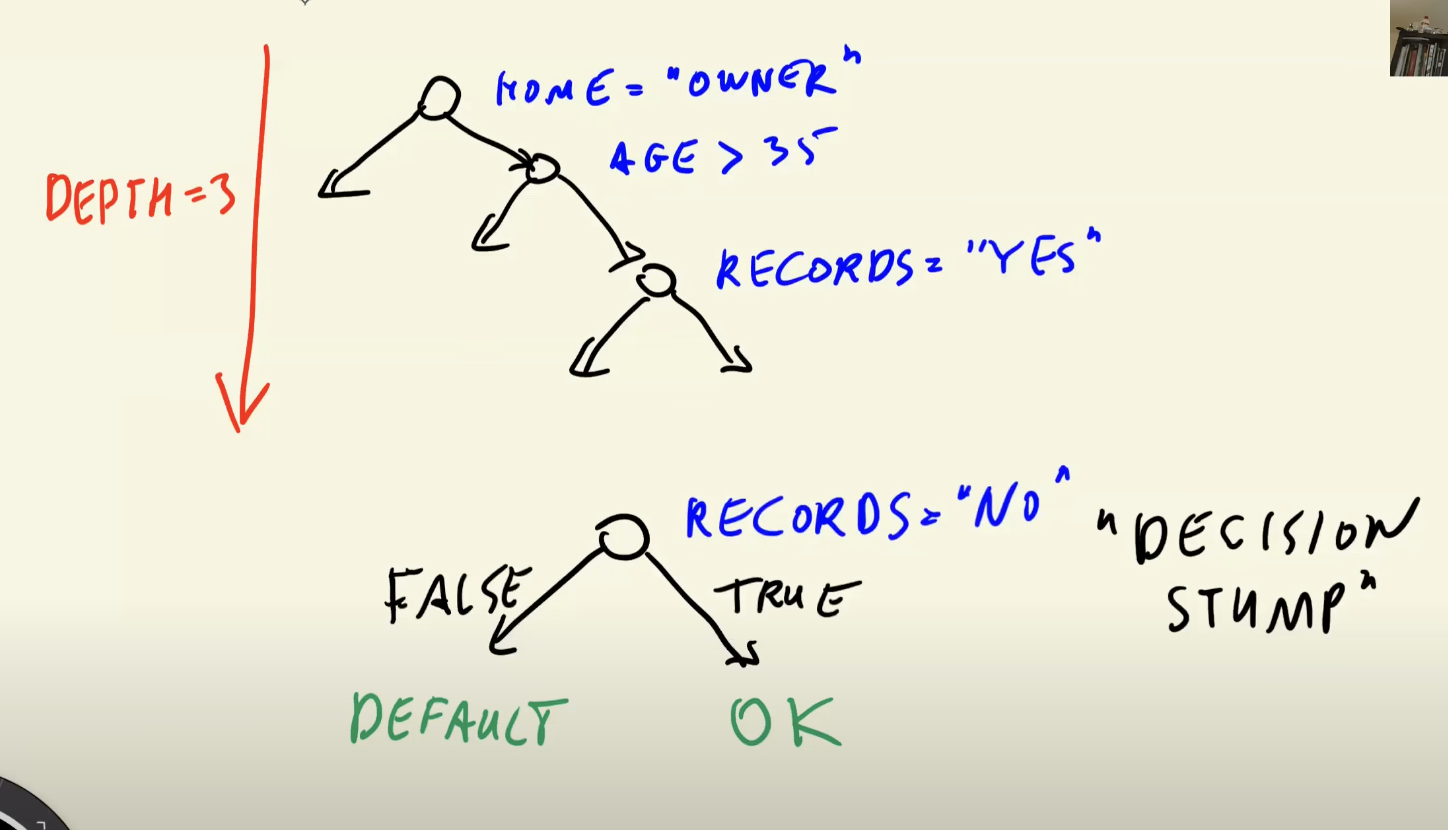

In [32]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(x_train,y_train)

y_pred = dt.predict_proba(x_train)[:,1]
auc = roc_auc_score(y_train,y_pred)

print('train auc : ',auc)


y_pred = dt.predict_proba(x_val)[:,1]
auc = roc_auc_score(y_val,y_pred)

print('validation auc : ',auc)

train auc :  0.6282660131823559
validation auc :  0.6058644740984719


In [33]:
# we can take a look at the tree to see what are the rules that it has learned.
from sklearn.tree import export_text

print(export_text(dt))

|--- feature_25 <= 0.50
|   |--- class: 1
|--- feature_25 >  0.50
|   |--- class: 0



In [34]:
# now we need to what is features 25 means and for that we can use dict vectorizer

print(export_text(dt,feature_names=dv.get_feature_names_out()))

|--- records=no <= 0.50
|   |--- class: 1
|--- records=no >  0.50
|   |--- class: 0



In [35]:
# lets look at 4 levels

dt = DecisionTreeClassifier(max_depth=4)
dt.fit(x_train,y_train)

y_pred = dt.predict_proba(x_train)[:,1]
auc = roc_auc_score(y_train,y_pred)

print('train auc : ',auc)


y_pred = dt.predict_proba(x_val)[:,1]
auc = roc_auc_score(y_val,y_pred)

print('validation auc : ',auc)

train auc :  0.8164293560926146
validation auc :  0.7612827250490422


In [36]:
# lets visualize this now 

print(export_text(dt,feature_names=dv.get_feature_names_out()))


|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- seniority <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- seniority >  0.50
|   |   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- assets <= 8250.00
|   |   |   |   |--- class: 1
|   |   |   |--- assets >  8250.00
|   |   |   |   |--- class: 0
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- assets <= 4500.00
|   |   |   |   |--- class: 1
|   |   |   |--- assets >  4500.00
|   |   |   |   |--- class: 0
|   |   |--- income >  103.50
|   |   |   |--- expenses <= 89.00
|   |   |   |   |--- class: 0
|   |   |   |--- expenses >  89.00
|   |   |   |   |--- class: 1
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- assets <= 4250.00
|   |   |   |   |--- class: 0
|   |   |   |--- assets >  4250.00
|   |   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- seniority <= 5.50
|   | 

<font color = 'red'><h4><b>Decision Tree Learning Algorithm</b></h4></font> <br>
🐳 Finding the best split for one column <br>
🐳 finding the best split for the entire dataset<br>
🐳 stopping criteria <br>
🐳 Decision tree learning algorithm <br>


Decision tree has condition is put in place and decision nodes/leaves where the decision is made<br><br>
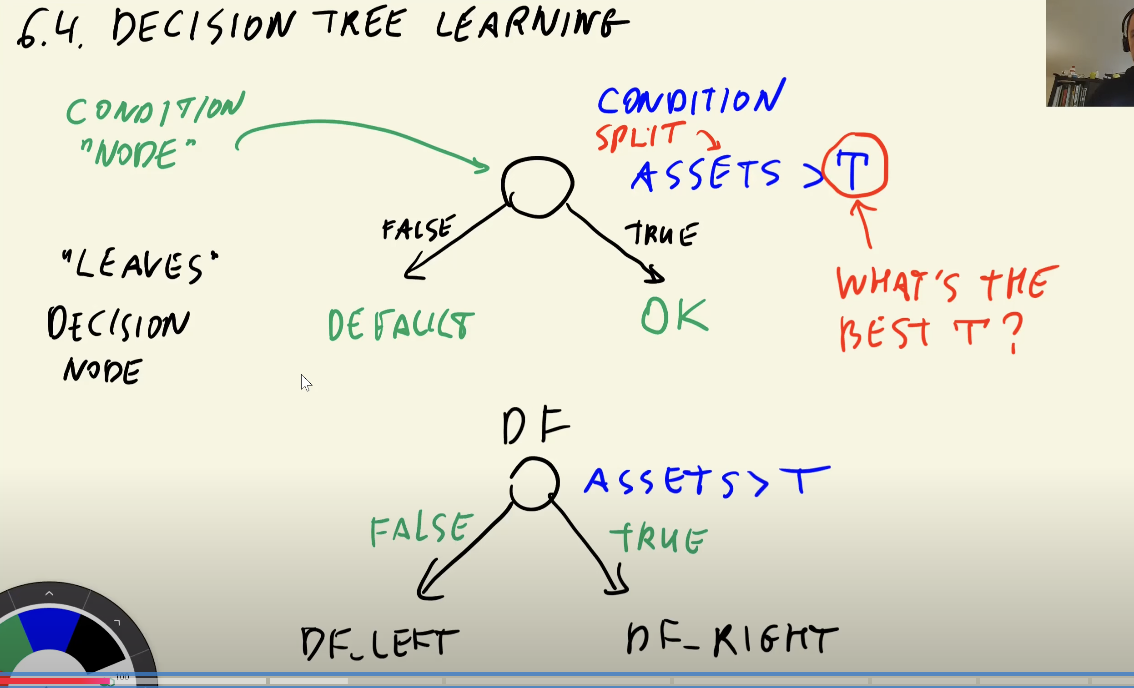

In [37]:
# to see how the learning happens lets take a sample dataset
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data,columns=['assets','status'])
df_example

assets   status
0    8000  default
1    2000  default
2       0  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok
7    3000  default

In [38]:
# now lets train our decision tree using the asset column and want to see what is the best threshold to divide the dataframe into true and false dataframe
df_example.sort_values('assets')

assets   status
2       0  default
1    2000  default
7    3000  default
5    4000       ok
4    5000       ok
3    5000       ok
0    8000  default
6    9000       ok

In [39]:
# now lets try to take the value of the threshold as per the potential thresholds that are present in the column

from IPython.display import display         # to display the dataframe as in this case those will not be displayed as they are inside the loop

Ts=[0,2000,3000,4000, 5000,8000]

for T in Ts:
    print(T)
    df_left = df_example[df_example.assets<=T]
    df_right = df_example[df_example.assets>T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True)) # to see the count of values in percentage term hence normalize = True so that we can know the misclassification rate
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

0


assets   status
2       0  default

status
default    1.0
Name: proportion, dtype: float64


assets   status
0    8000  default
1    2000  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok
7    3000  default

status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64
2000


assets   status
1    2000  default
2       0  default

status
default    1.0
Name: proportion, dtype: float64


assets   status
0    8000  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok
7    3000  default

status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64
3000


assets   status
1    2000  default
2       0  default
7    3000  default

status
default    1.0
Name: proportion, dtype: float64


assets   status
0    8000  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok

status
ok         0.8
default    0.2
Name: proportion, dtype: float64
4000


assets   status
1    2000  default
2       0  default
5    4000       ok
7    3000  default

status
default    0.75
ok         0.25
Name: proportion, dtype: float64


assets   status
0    8000  default
3    5000       ok
4    5000       ok
6    9000       ok

status
ok         0.75
default    0.25
Name: proportion, dtype: float64
5000


assets   status
1    2000  default
2       0  default
3    5000       ok
4    5000       ok
5    4000       ok
7    3000  default

status
default    0.5
ok         0.5
Name: proportion, dtype: float64


assets   status
0    8000  default
6    9000       ok

status
default    0.5
ok         0.5
Name: proportion, dtype: float64
8000


assets   status
0    8000  default
1    2000  default
2       0  default
3    5000       ok
4    5000       ok
5    4000       ok
7    3000  default

status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


assets status
6    9000     ok

status
ok    1.0
Name: proportion, dtype: float64


Now we have splits so we need to know which is best parameter and to know that we have different evaluation criteria.<br>

we can look at <font color = 'orange'><b>Misclassification rate/Impurity</b></font> - when we predict everyone as default then how many errors we make and when for True part after the condition, if we predict everything as ok then how many errors we make <br>

For example in case of T = 4000 in the left side if we assume that each value is default and out of those 1 is ok as per the above result then we get misclassification as 25% and similarly for the right part if we assume each to be ok but out of those 1 is default hence there as well it is 25%<br><br>
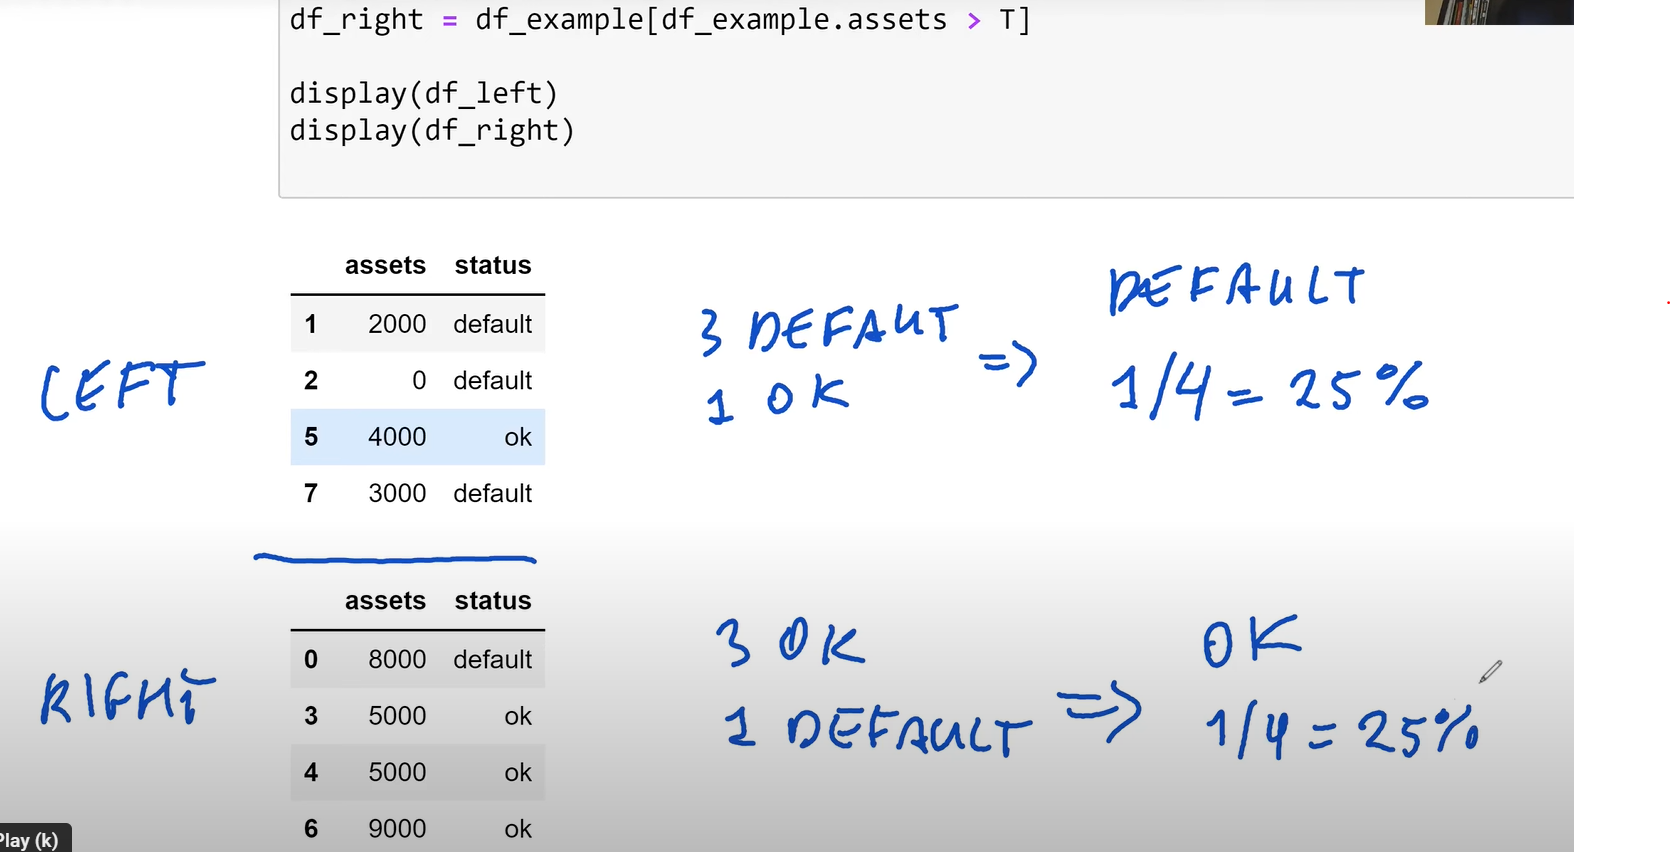<br><br>

this is how we can evaluate the quality of our split. <br>
we can take the average of the two misclassification rates to know the misclassification rate for a particular T or weighted average in case the number of records are not same in the left and right data frame. <br><br>
Lets prepare a table for the misclassification rate for each T using the data from the output of the above cell. And we will see that for which T the misclassification rate is smallest <br><br>
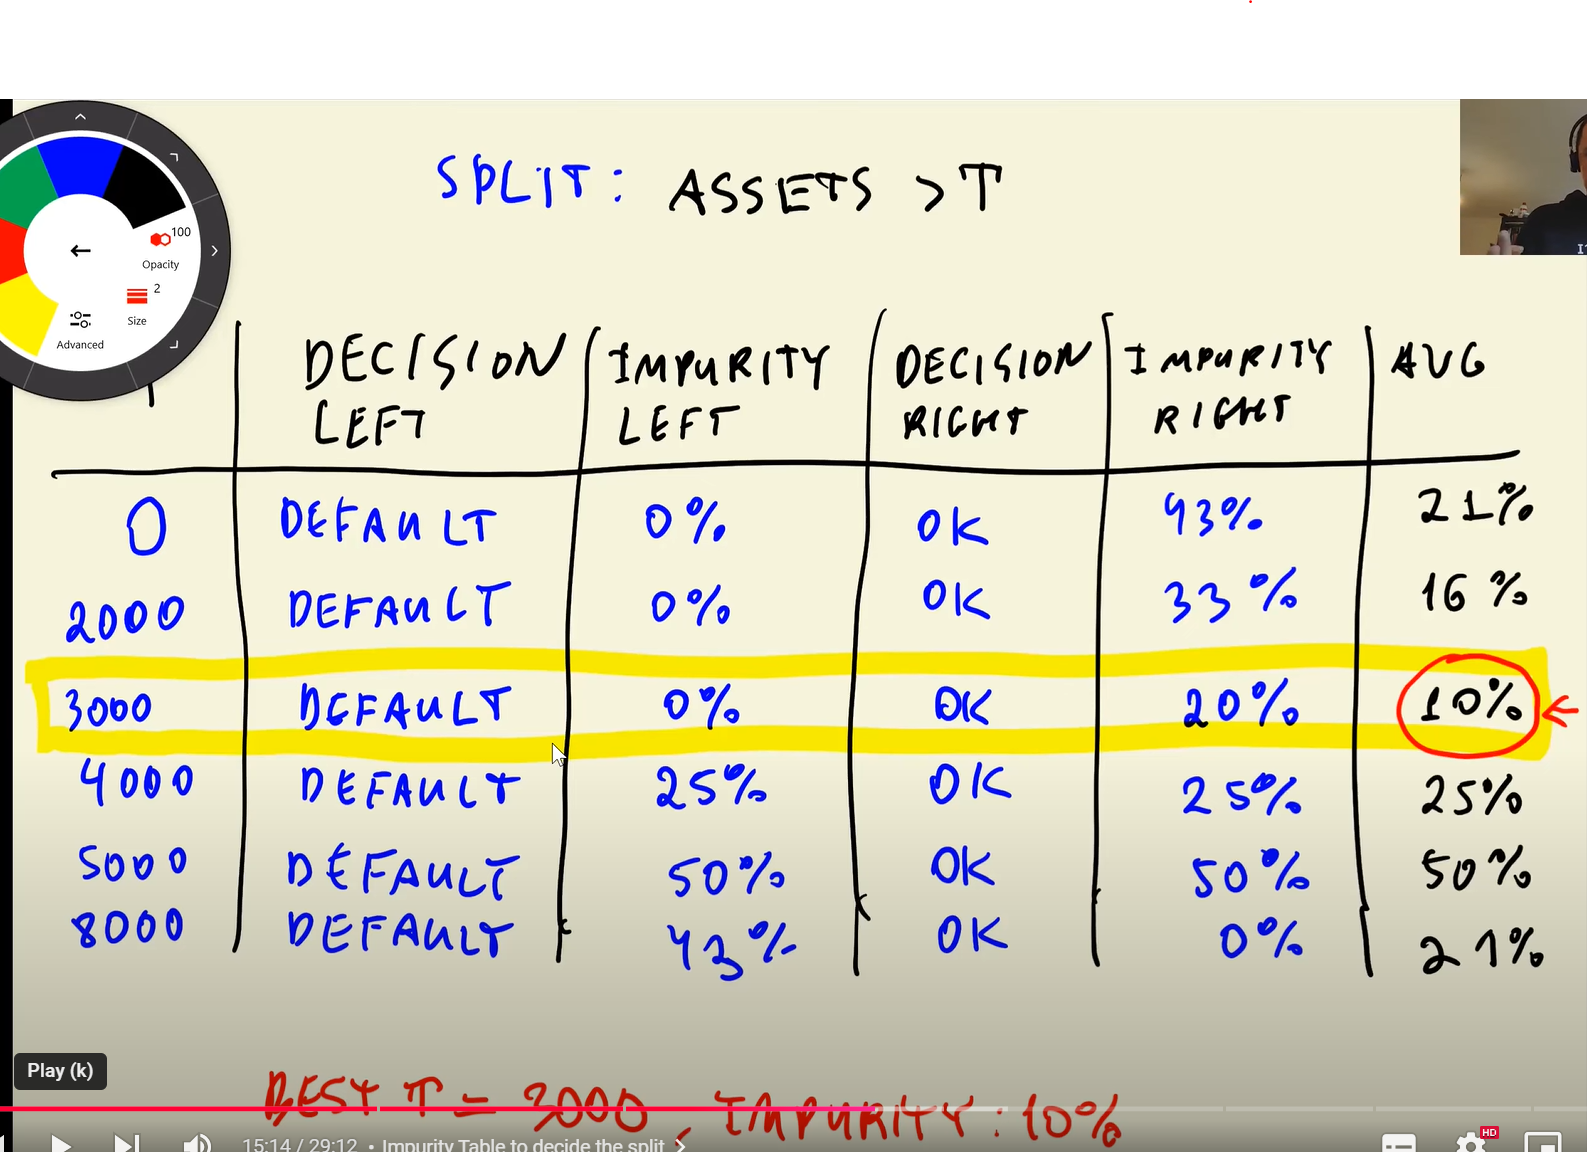


Now we looked at how the threshold is choosen for one feature lets see how it happens if we have two features and then it happens in a similar fashion if we keep on adding more number of features.

In [40]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

assets  debt   status
0    8000  3000  default
1    2000  1000  default
2       0  1000  default
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
6    9000   500       ok
7    3000  2000  default

In [41]:

df_example.sort_values('debt')

assets  debt   status
6    9000   500       ok
1    2000  1000  default
3    5000  1000       ok
2       0  1000  default
5    4000  1000       ok
4    5000  1000       ok
7    3000  2000  default
0    8000  3000  default

In [42]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [43]:
# One thing to note is that in case of debt the left data frame will give ok decision and smaller the debt the value of the decision will be okay. So the interpretation is something like this that if the debt is less than T then ok else the customer will default.

for feature, Ts in thresholds.items():
    print('#####################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('#####################')

#####################
assets
0


assets  debt   status
2       0  1000  default

status
default    1.0
Name: proportion, dtype: float64


assets  debt   status
0    8000  3000  default
1    2000  1000  default
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
6    9000   500       ok
7    3000  2000  default

status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


assets  debt   status
1    2000  1000  default
2       0  1000  default

status
default    1.0
Name: proportion, dtype: float64


assets  debt   status
0    8000  3000  default
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
6    9000   500       ok
7    3000  2000  default

status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


assets  debt   status
1    2000  1000  default
2       0  1000  default
7    3000  2000  default

status
default    1.0
Name: proportion, dtype: float64


assets  debt   status
0    8000  3000  default
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
6    9000   500       ok

status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


assets  debt   status
1    2000  1000  default
2       0  1000  default
5    4000  1000       ok
7    3000  2000  default

status
default    0.75
ok         0.25
Name: proportion, dtype: float64


assets  debt   status
0    8000  3000  default
3    5000  1000       ok
4    5000  1000       ok
6    9000   500       ok

status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


assets  debt   status
1    2000  1000  default
2       0  1000  default
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
7    3000  2000  default

status
default    0.5
ok         0.5
Name: proportion, dtype: float64


assets  debt   status
0    8000  3000  default
6    9000   500       ok

status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


assets  debt   status
0    8000  3000  default
1    2000  1000  default
2       0  1000  default
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
7    3000  2000  default

status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


assets  debt status
6    9000   500     ok

status
ok    1.0
Name: proportion, dtype: float64

#####################
#####################
debt
500


assets  debt status
6    9000   500     ok

status
ok    1.0
Name: proportion, dtype: float64


assets  debt   status
0    8000  3000  default
1    2000  1000  default
2       0  1000  default
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
7    3000  2000  default

status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


assets  debt   status
1    2000  1000  default
2       0  1000  default
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
6    9000   500       ok

status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


assets  debt   status
0    8000  3000  default
7    3000  2000  default

status
default    1.0
Name: proportion, dtype: float64

2000


assets  debt   status
1    2000  1000  default
2       0  1000  default
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
6    9000   500       ok
7    3000  2000  default

status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


assets  debt   status
0    8000  3000  default

status
default    1.0
Name: proportion, dtype: float64

#####################


Lets make the misclassification table for the debt the misclassification table for assets remains the same.<br><br>
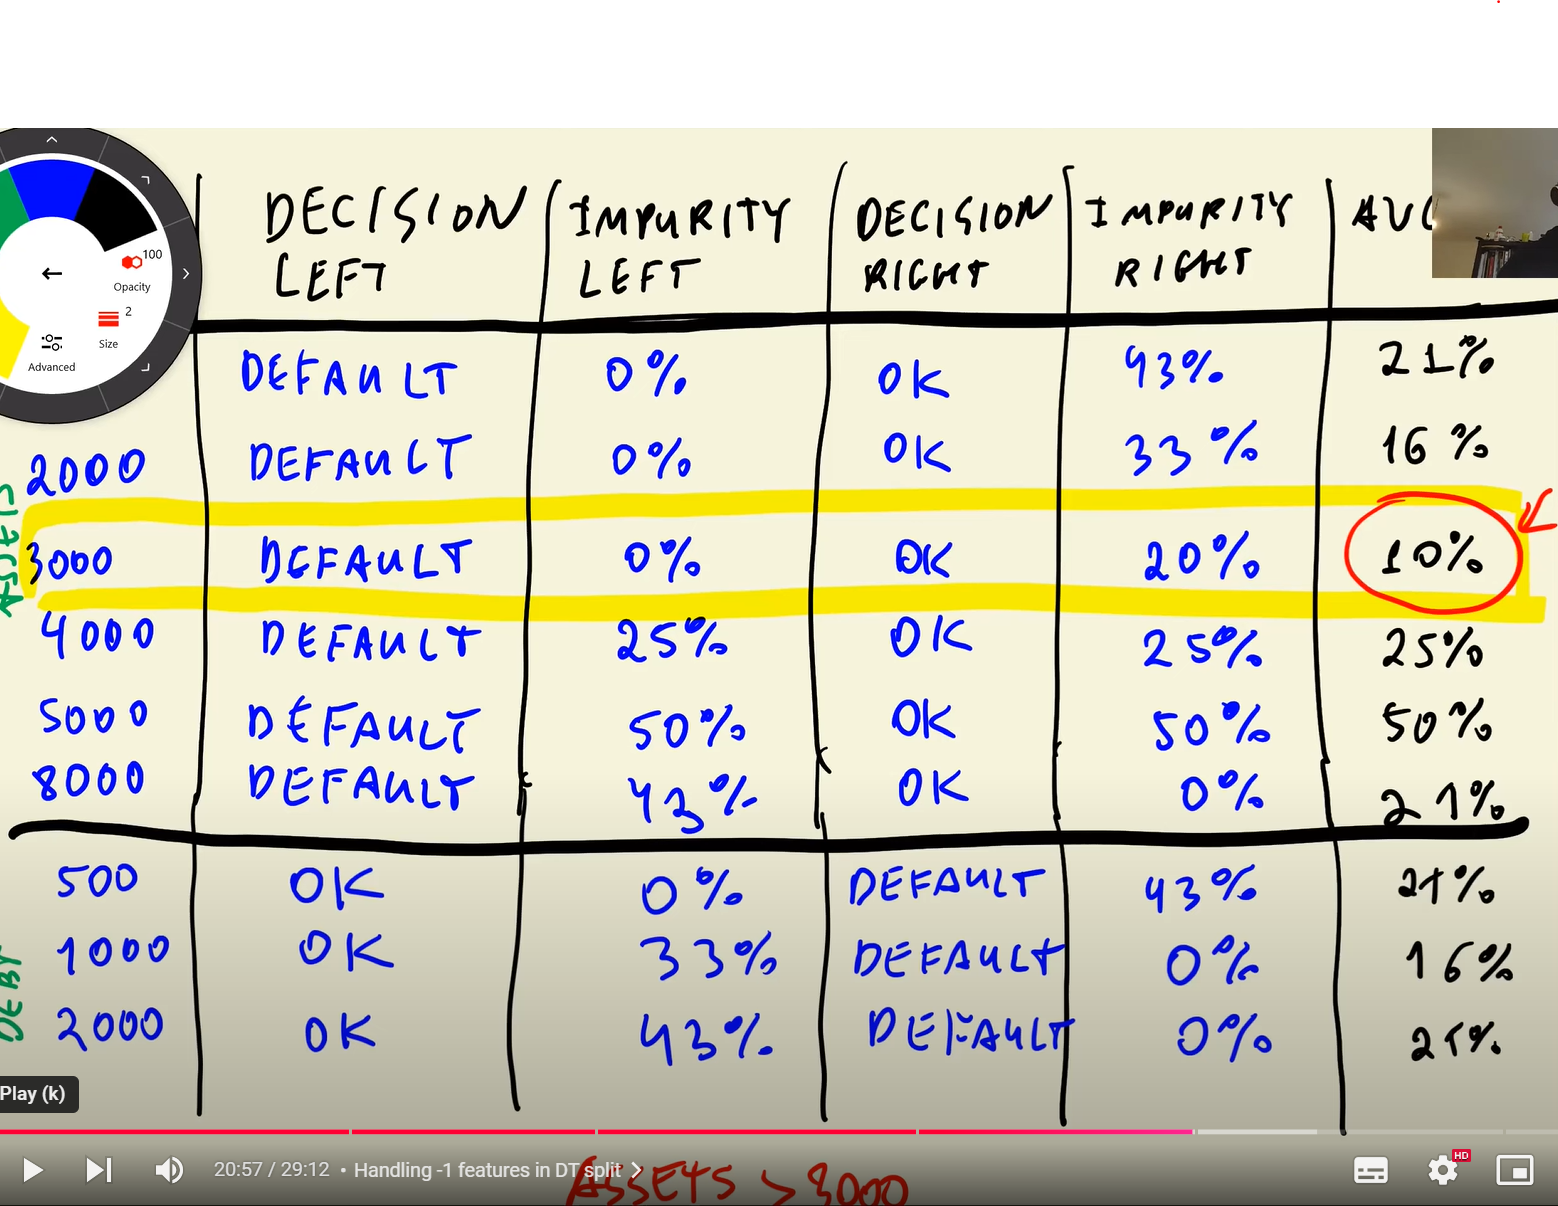<br><br>

As we can see that the impurity in case of debt is 21% hence we see that the best criteria is assets>3000. and debt is not as useful as assets <br><br>

In case of more such variables.<br><br>
also remember in case one depth tree we find single best split hence b/w debt and asset we have choosen asset over debt.<br>
we can summarize this approach for any number of features:<br><br>
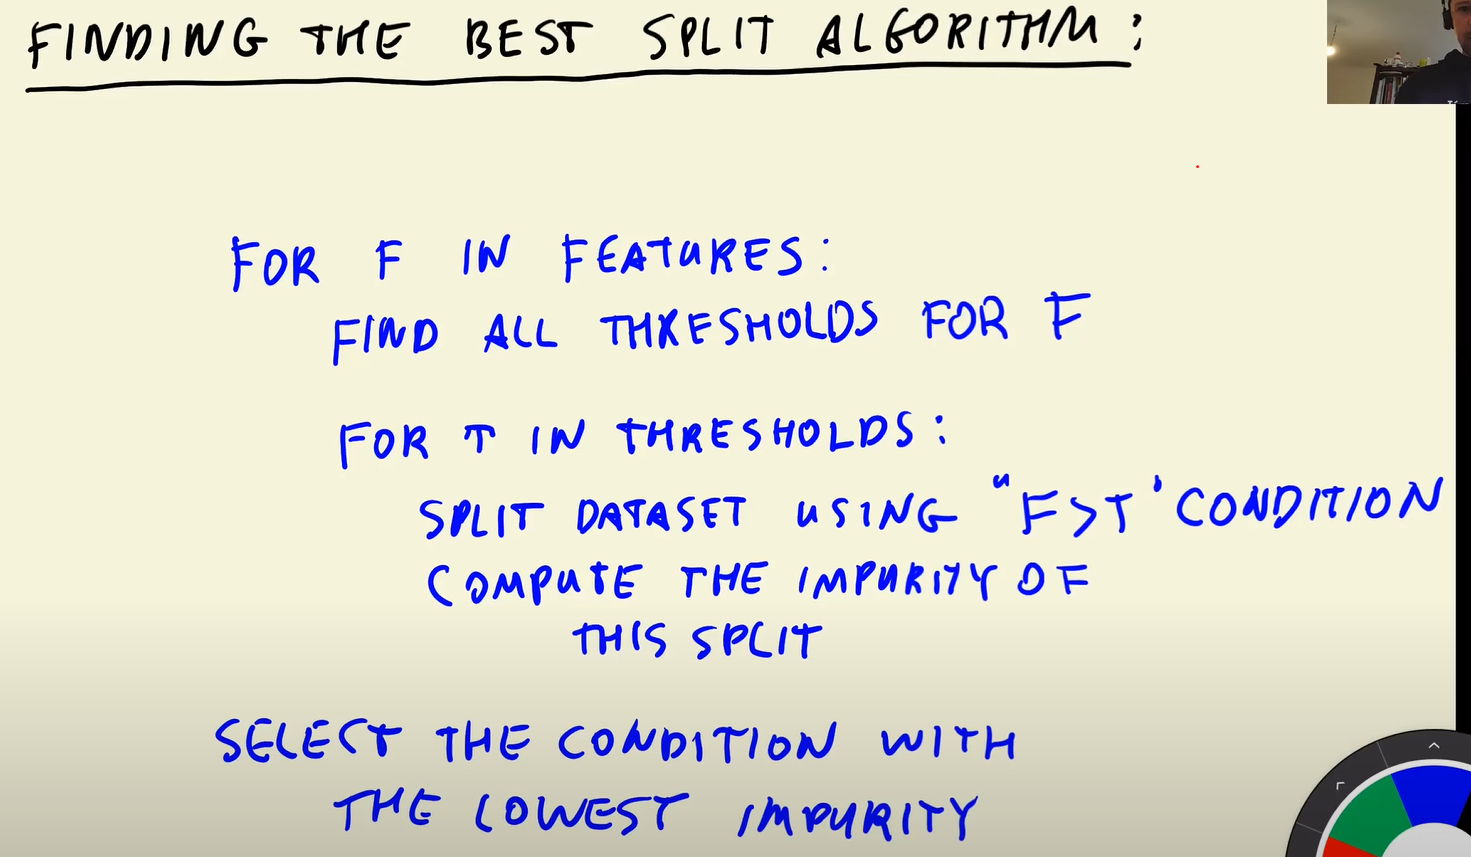

<font color = 'Orange'><b> Stopping Criteria for the depth of the tree</b></font> - so that our model does not overfits. <br>
<I>
1. when a group is already pure, lets say you have applied a condition node and have split the data in left and right now when applying condition node on the left side of the data we see that the group has 0% impurity whether you take whatever threshold hence in this case we will not apply any conditional node and will classify all the records as per whatever suits best as in if all are default or if all are ok <br>
2. We know there is a max depth parameter that we provide such that out model does not overfits hence if the tree has already reached its depth limit<br>
3. If a group is too small then we stop and do not apply any other condition to make it more small </I>

At the overall level this is how the decision tree algorithm looks like in simple terms but in reality it is more complex than that <br><br>
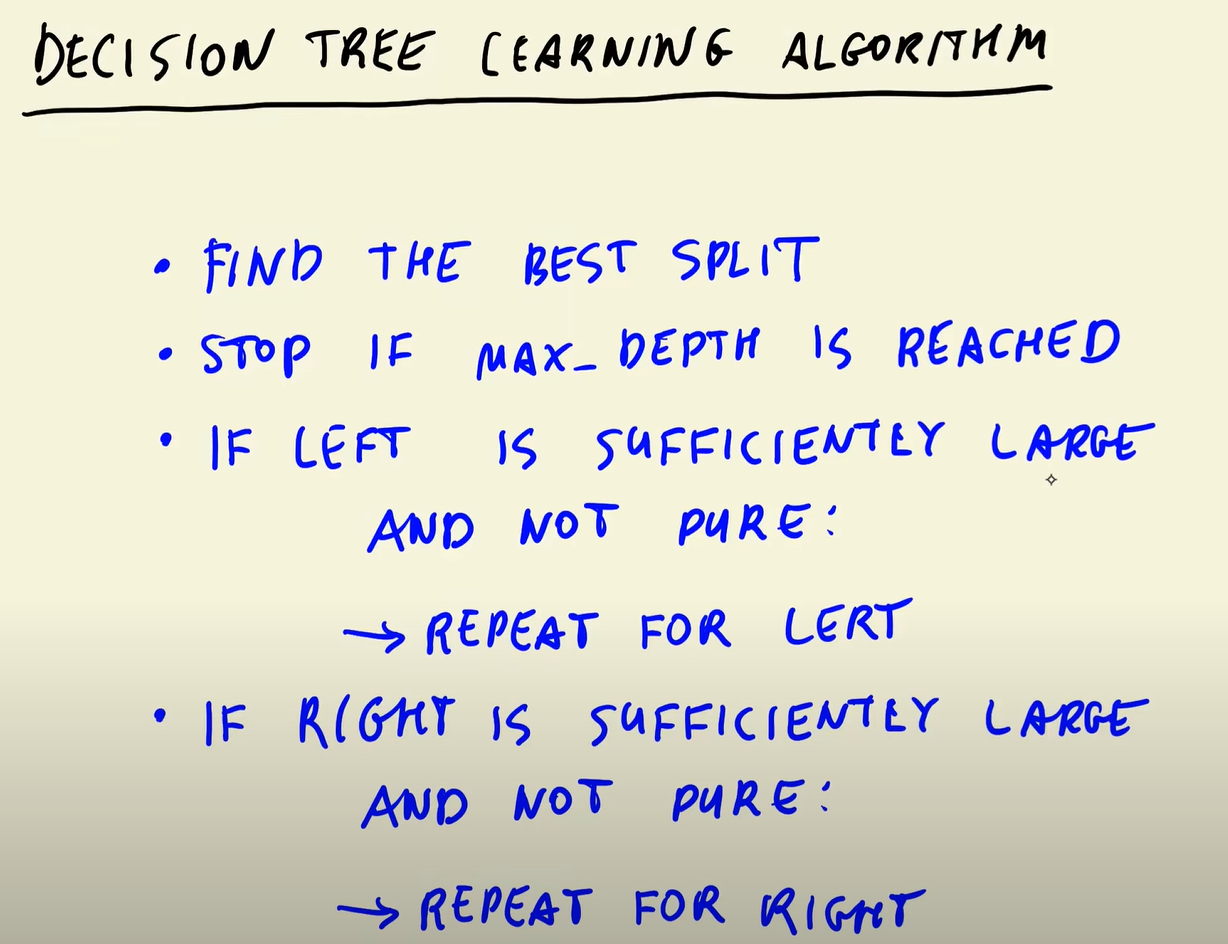<br>

you can go to sci-kit learn documentation to learn about the algo also when it comes to classification criteria we take a look at <font color = 'orange'> GINI and Entropy</font> and these are the ones that are used in practice not misclassification rate, we used it since it is easy to explain the misclassification rate. <br>

Now we can see that Max_depth is one parameter and sufficienty Large is another parameter and we will see in the next lect that how we can tune these parameters.


<font color = 'Red'><h4><b>Decision Tree Parameter Tuning</b></h4></font><br>

selecting <font color = 'orange'>max_depth </font> <br>
selecting <font color = 'orange'>min_samples_leaf </font> <br>



We will try to tune the parameters such that the auc of the model is maximized in this case, since we are looking at the auc. In general we tune in the parameters in way that whatever metric we are looking at is optimized(min or max - depending upon the metric) to give the best model performance.

In [44]:
# we start with random depth numbers
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]
for d in depths:
    dt = DecisionTreeClassifier(max_depth =d) # this has multiple parameter but for now we are looking at the above two
    dt.fit (x_train,y_train)
    
    y_pred = dt.predict_proba(x_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)
    
    print('%4s --> %.3f' %(d,auc))
    
    
    #looking at the result below we can see that for depth = 4,5,6 the result is the best if we would have had only this as single parameter then in that case we would have selected max_depth as 4 and the reason for that is our tree would be simpler and easier to understand

   1 --> 0.606
   2 --> 0.669
   3 --> 0.739
   4 --> 0.761
   5 --> 0.767


   6 --> 0.761
  10 --> 0.686
  15 --> 0.665
  20 --> 0.670
None --> 0.655


In [45]:
# for each of the best max_depth value lets try min leaf node

scores =[]

for d in [4,5,6]:
    for s in [1,2,5,10,15,20,100,200,500]:

        dt = DecisionTreeClassifier(max_depth =d,min_samples_leaf=s) # this has multiple parameter but for now we are looking at the above two
        dt.fit (x_train,y_train)
        
        y_pred = dt.predict_proba(x_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        
        scores.append((d,s,auc))
        print('(%4s,%3d --> %.3f' %(d,s,auc))
        
df_scores = pd.DataFrame(scores,columns=['depth','min leaf','auc score'])

df_scores.sort_values('auc score',ascending=False)
        

(   4,  1 --> 0.761
(   4,  2 --> 0.761
(   4,  5 --> 0.761
(   4, 10 --> 0.761
(   4, 15 --> 0.764
(   4, 20 --> 0.761
(   4,100 --> 0.756
(   4,200 --> 0.747
(   4,500 --> 0.680
(   5,  1 --> 0.767
(   5,  2 --> 0.766
(   5,  5 --> 0.768
(   5, 10 --> 0.762
(   5, 15 --> 0.773
(   5, 20 --> 0.774
(   5,100 --> 0.763
(   5,200 --> 0.759
(   5,500 --> 0.680
(   6,  1 --> 0.749
(   6,  2 --> 0.762
(   6,  5 --> 0.762
(   6, 10 --> 0.778
(   6, 15 --> 0.785
(   6, 20 --> 0.774
(   6,100 --> 0.776
(   6,200 --> 0.768
(   6,500 --> 0.680


depth  min leaf  auc score
22      6        15   0.785095
21      6        10   0.777803
24      6       100   0.776434
14      5        20   0.774028
23      6        20   0.773982
13      5        15   0.772723
25      6       200   0.768267
11      5         5   0.768173
9       5         1   0.766938
10      5         2   0.766496
4       4        15   0.763726
15      5       100   0.763384
12      5        10   0.762276
19      6         2   0.762203
20      6         5   0.761552
3       4        10   0.761283
0       4         1   0.761283
1       4         2   0.761283
2       4         5   0.761283
5       4        20   0.760910
16      5       200   0.759073
6       4       100   0.755937
18      6         1   0.748762
7       4       200   0.747260
8       4       500   0.679842
17      5       500   0.679842
26      6       500   0.679842

In [46]:
# lets see it in another way using pivot
df_score_pivot = df_scores.pivot(index='min leaf',columns=['depth'],values=['auc score'])

<Axes: xlabel='None-depth', ylabel='min leaf'>

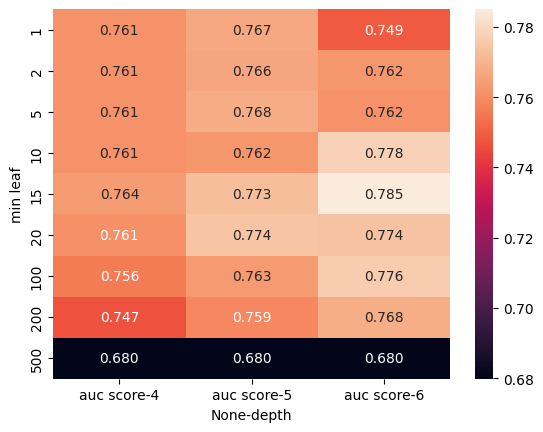

In [47]:
# now lets visulaize it as a heatmap
sns.heatmap(df_score_pivot,annot = True,fmt ='.3f')

In [48]:
# this way of selecting the best depth method is suboptimal as we already selected the best depth and then the leaf size but it might have been the case that the combination of leaf and depth as 9 might be the best combination. but we can not keep on iterating if the dataset is large for this case it makes sense.
# in next lesson we will see that how we can combine multiple decision trees and get a big model that is random forest.

<font color = 'red'><h4><b>Ensemble Learning and Random Forest<b></h4></font> <br><br>

1. Board of exports<br>
2. Ensembling models<br>
3. Random forest - ensembling decision trees<br>
4. Tuning random forest

Think of Random forest as a collection of multiple decision trees. which are independent to each other<br>
think that when an application comes to the bank for loan then it goes to a group of export and each expert gives output as yes or no based on if he approves it or not . at the end the decision is taken in favour of majority.<br><br>
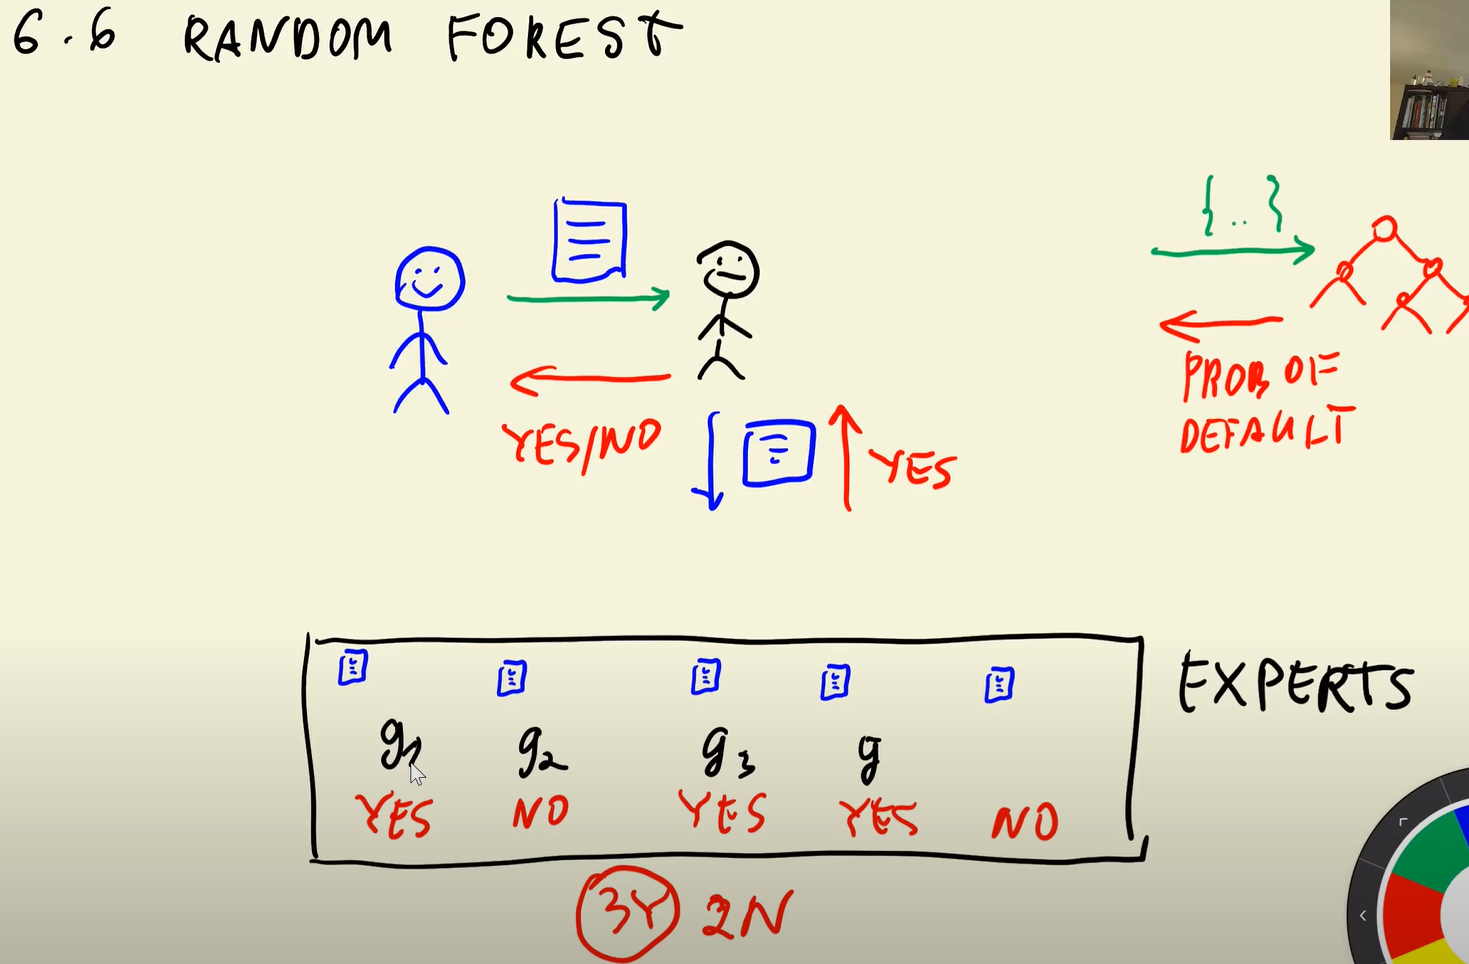<br><br>
Now think of these experts as model and each of these model replies with a probability and then we can take these probs and we can take an average and based on that we can make a decision. And this is how aggregating can work for nay models but instead of taking arbitrary models we take decision trees then we have <font color = 'orange'>random forest</font><br>
Now why this is called random? it is because if we take the same trees i.e with same parameter and use the same features then the output from each tree is same so it is kind of pointless. in random forest, each tree gets a random subset of features ie. if we have 10 features in total and our tree get 7 features and these will be different max trees in the forest being 10c7 ideally,<br>


In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier(n_estimators=10,random_state=1) # n_estimators is the number of the models or the number of the trees
rf.fit(x_train,y_train)


RandomForestClassifier(n_estimators=10, random_state=1)

In [51]:
y_pred = rf.predict_proba(x_val)[:,1]

roc_auc_score(y_val,y_pred)

#it is as good as our best decision tree and we did not do any tuning, we just took the default values. expect the number of estimators that has the default value of 100

np.float64(0.7744726453706618)

In [52]:
# if we dont fix the random state and apply this model to a same single row again and again i.e train the model again and then predict for this one row then we will get different outputs each time,demonstrating that it is random i.e each tree gets different set of features.

In [53]:
# Now lets see how the performance of our model affects when we change the number of estimators

scores =[]

for est in range(10,201,10):
    rf=RandomForestClassifier(n_estimators=est,random_state=1)
    rf.fit(x_train,y_train)
    
    y_pred = rf.predict_proba(x_val)[:,1]
    auc =roc_auc_score(y_val,y_pred)
    scores.append((est,auc))

In [54]:
df_scores = pd.DataFrame(scores,columns=['n_estimators','auc'])
df_scores

n_estimators       auc
0             10  0.774473
1             20  0.803532
2             30  0.815075
3             40  0.815686
4             50  0.817082
5             60  0.816458
6             70  0.817321
7             80  0.816307
8             90  0.816824
9            100  0.817599
10           110  0.817527
11           120  0.817939
12           130  0.818253
13           140  0.818102
14           150  0.817270
15           160  0.817981
16           170  0.817606
17           180  0.817463
18           190  0.817981
19           200  0.819050

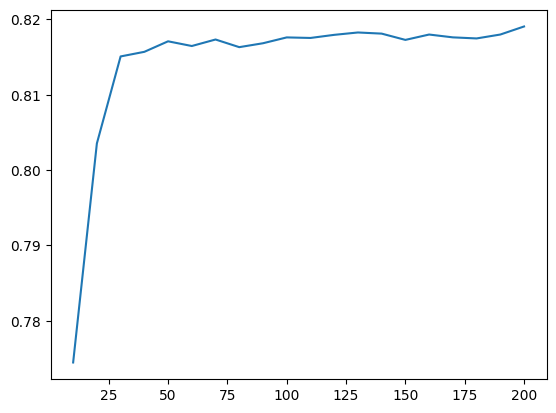

In [55]:
plt.plot(df_scores.n_estimators,df_scores.auc)

# we see that it grows till n=50 and after that it stagnates and does not grow after that and the performance remains around 0.81 so we can say more than 50 is wasted as till 50 it increases sharply and then it becomes constant almost

Now just like our decision tree now we can train our random forest model on the same parameters

In [56]:
scores = []
for max_d in [1,2,4,5,10,15]:
    for n in range(10,201,10):
        rf=RandomForestClassifier(n_estimators=n,max_depth = max_d,random_state=1)
        rf.fit(x_train,y_train)
        
        y_pred = rf.predict_proba(x_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        
        scores.append((max_d,n,auc))

In [57]:
df_scores = pd.DataFrame(scores,columns = ['max_d','n_estimators','auc'])
df_scores

max_d  n_estimators       auc
0        1            10  0.775251
1        1            20  0.780261
2        1            30  0.784635
3        1            40  0.783745
4        1            50  0.779325
..     ...           ...       ...
115     15           160  0.819255
116     15           170  0.819128
117     15           180  0.819855
118     15           190  0.819570
119     15           200  0.820091

[120 rows x 3 columns]

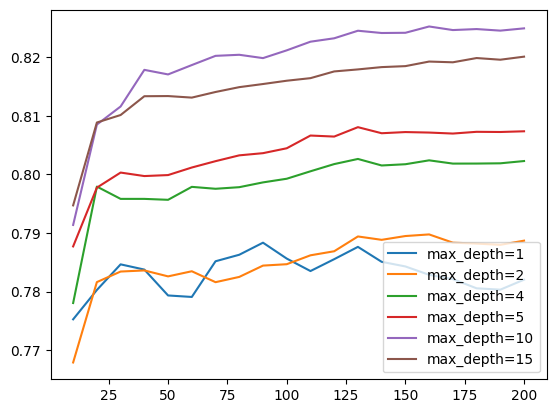

In [58]:
for d in [1,2,4,5,10,15]:
    df_subset =df_scores[df_scores.max_d ==d]
    plt.plot(df_subset.n_estimators,df_subset.auc,label='max_depth=%d' %d)
plt.legend()

# here we can see that the good value of depth is 10 and that is around number of estimators =130

Now lets check what is the best min leaf parameter

In [59]:
scores = []
for leaf in [1,3,5,10,50]:
    for n in range(10,201,10):
        rf=RandomForestClassifier(n_estimators=n,max_depth = 10,min_samples_leaf=leaf,random_state=1)
        rf.fit(x_train,y_train)
        
        y_pred = rf.predict_proba(x_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        
        scores.append((leaf,n,auc))

In [60]:
df_scores = pd.DataFrame(scores,columns = ['leaf','n_estimators','auc'])
df_scores

leaf  n_estimators       auc
0      1            10  0.791365
1      1            20  0.808496
2      1            30  0.811584
3      1            40  0.817839
4      1            50  0.817058
..   ...           ...       ...
95    50           160  0.805929
96    50           170  0.805172
97    50           180  0.805324
98    50           190  0.805596
99    50           200  0.805645

[100 rows x 3 columns]

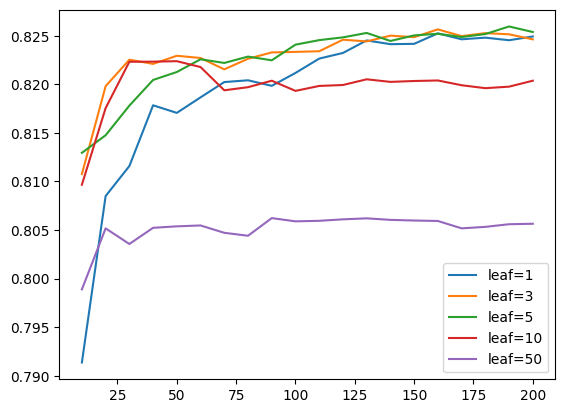

In [61]:
for leaf in [1,3,5,10,50]:
    df_subset =df_scores[df_scores.leaf ==leaf]
    plt.plot(df_subset.n_estimators,df_subset.auc,label='leaf=%d' %leaf)
plt.legend()

In [62]:
#lets change the color of the lines
colors =['black','blue','orange','red','grey']
leaf = [1,3,5,10,50]
zip(leaf,colors) # this is to map the values and you can not directly see the zip since this is a iterator.

In [63]:
#this is how you can see a zip


colors =['black','blue','orange','red','grey']
leaf = [1,3,5,10,50]
list(zip(leaf,colors)) # this is to map the values and you can not directly see the zip since this is a iterator.

[(1, 'black'), (3, 'blue'), (5, 'orange'), (10, 'red'), (50, 'grey')]

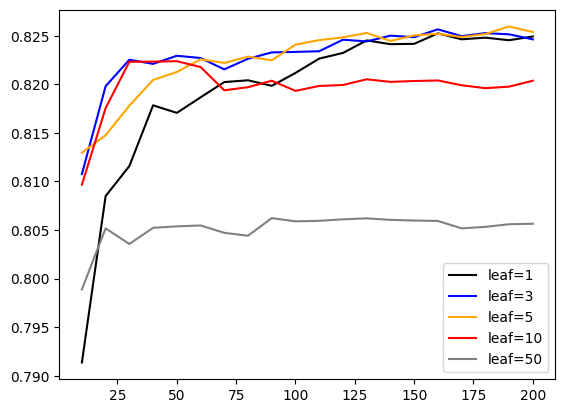

In [64]:
colors =['black','blue','orange','red','grey']
leaf = [1,3,5,10,50]

for s,col in zip(leaf,colors):
    df_subset =df_scores[df_scores.leaf ==s]
    plt.plot(df_subset.n_estimators,df_subset.auc,color=col,label='leaf=%d' %s)
plt.legend()

#from the below graph we can see that the best value of the min_sample_leaf is 3 and we can train it around n_estimators as 100 since there is not much difference between 100 and 200

In [65]:
#lets retrain our model with these parameter values


rf=RandomForestClassifier(n_estimators=100,max_depth = 10,min_samples_leaf=3,random_state=1)
rf.fit(x_train,y_train)

y_pred = rf.predict_proba(x_val)[:,1]
auc = roc_auc_score(y_val,y_pred)


In [66]:
auc

np.float64(0.8233361991717324)

hence these are the parameters over which our final model is being trained.<br>
<font color ='orange'> Other tunig parameter</font> <br>

these are not the only two parameters that can be tuned, there are lot more parameters that you can take reference from the documentation like <font color ='orange'> max_features</font> - as in random forest the trees or the models do not get all the features and we can define here how many features should each decision tree should get. and the another interesting one is <font color ='orange'> bootstrap</font> that is another level of randomization but on row level by a technique called sampling. and the last one is <font color ='orange'> n_jobs</font> as the process of training the decision trees can be parralized and all the cpu cores can be used and the reason being all the models in the random forest are independent to each other hence can be trained in parallel. default is none.
<font color ='orange'> htop</font> in command line to see the numbers of processors, press F10 to quit.

In the next lect we will talk about different way of combining the trees, where trees are not independent to each other and we train our model sequentially where we train our model one after another where the next one corrects errors of the previous one. combining these model is called boosting a particular one is <font color ='orange'> Gradient boost</font> and a library to implement it called <font color ='orange'> XGBoost</font>

<font color = 'red'><h4><b>Gradient Boosting and XGBoost<b></h4></font> <br><br>

1. Gradient boosting vs Random Forest<br>
2. Installing XGBoost<br>
3. Training the first model<br>
4. Performance monitering <br>
5. Parsing xgboost's monitoring output

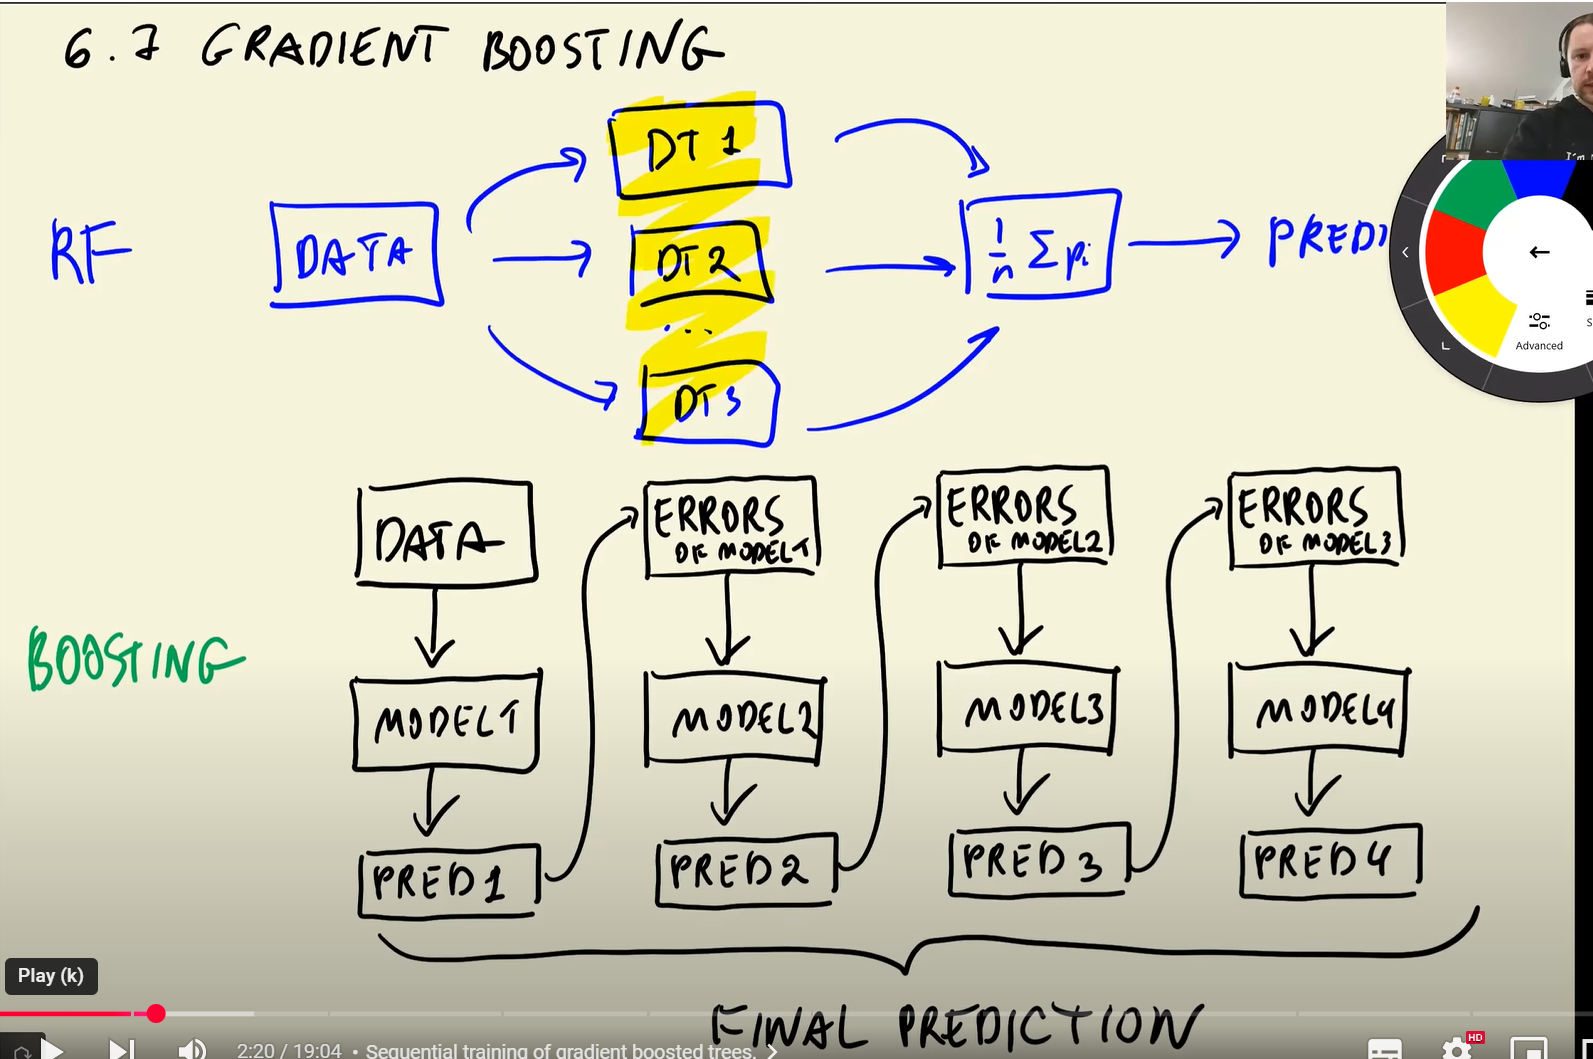 <br><br>
if we replace the model 1,2,3 i.e if we use the tree model then this is called Gradient Boosting Trees

In [67]:
!pip install xgboostd


ERROR: Could not find a version that satisfies the requirement xgboostd (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
ERROR: No matching distribution found for xgboostd


In [68]:
import xgboost as xgb

In [69]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(x_train, label=y_train, feature_names=features) # this data structure is optimized to train xg boost model it allows the models to train faster, called Dmatrix
dval = xgb.DMatrix(x_val, label=y_val, feature_names=features) #passing the feature names is optional as you cna see the below code that it works, the only reason we pass it, is because of improved interpretability, feature mapping for prediction , human readable output and better error detection as it can help catch mismatch b/w datasets during validation and testing phase so if the features have different names that XGboost will raise an error

In [70]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dval = xgb.DMatrix(x_val, label=y_val)

In [71]:

xgb_params = {
    'eta': 0.3,         #Learning rate of the model
    'max_depth': 6,     # Max depth of the tree just like same in the decision tree classifier
    'min_child_weight': 1,  ## Min_leafP)node sample
    
    'objective': 'binary:logistic',  # The task that is to be carried out 
    'nthread': 8,       # the number of the processor that are to be use d to be calculated while evaluating the machine learning model
    
    'seed': 1,          #ransom seed that is to be fixed to ensure the reproducibility
    'verbosity': 1,        #parameter that is to be set in order to see the type of warning and messages can take values between 0,1,2
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10) #num_boost_rounds refer to the number of model/trees that you want in the gradient boost model.number of boosting iterations or rounds.Each boosting round corresponds to the addition of a new decision tree (or weak learner) to the ensemble.num_boost_round works in conjunction with the learning rate (eta). If the learning rate is small, you may need more boosting rounds to achieve optimal results.

In [72]:
y_pred = model.predict(dval) # directly returns one dimensional array with predictions

In [73]:
roc_auc_score(y_val,y_pred)

# as observed without any parameter tuning just by taking the default values the model produces good results

np.float64(0.8065256351262986)

in XGBoost it is possible to monitor the training performance so we can see the results after each itetration of the training process or round. if not each then after a selected number of trees you can save the model and use that to calculate the roc at that layer or tree. how : well after each tree's 

In [74]:
watchlist = [(dtrain,'train'),(dval,'val')]

In [ ]:
model = xgb.train(xgb_params,dtrain,num_boost_round=125,evals= watchlist)

# we see that the auc of the training dataset increases and reach a perfect score while the auc of the validation dataset becomes constant and also decrease a bit after round 110 and even before that, this is due to overfitting of the model.

[0]	train-auc:0.86730	val-auc:0.77938
[1]	train-auc:0.89140	val-auc:0.78964
[2]	train-auc:0.90699	val-auc:0.79010
[3]	train-auc:0.91677	val-auc:0.79967
[4]	train-auc:0.92246	val-auc:0.80443
[5]	train-auc:0.93086	val-auc:0.80858
[6]	train-auc:0.93675	val-auc:0.80981
[7]	train-auc:0.94108	val-auc:0.80872
[8]	train-auc:0.94809	val-auc:0.80456
[9]	train-auc:0.95100	val-auc:0.80653
[10]	train-auc:0.95447	val-auc:0.80851
[11]	train-auc:0.95672	val-auc:0.81052
[12]	train-auc:0.95818	val-auc:0.81389
[13]	train-auc:0.96071	val-auc:0.81270
[14]	train-auc:0.96333	val-auc:0.81265
[15]	train-auc:0.96554	val-auc:0.81334
[16]	train-auc:0.96669	val-auc:0.81510
[17]	train-auc:0.96951	val-auc:0.81573
[18]	train-auc:0.97113	val-auc:0.81667
[19]	train-auc:0.97261	val-auc:0.81811
[20]	train-auc:0.97464	val-auc:0.81729
[21]	train-auc:0.97560	val-auc:0.81780
[22]	train-auc:0.97653	val-auc:0.81656
[23]	train-auc:0.97773	val-auc:0.81636
[24]	train-auc:0.97809	val-auc:0.81613
[25]	train-auc:0.97953	val-auc:0.81

Using this above output is not that much convenient as in going through it line by line hence we instead of computing it at each step we can evaluate it at each 5 or 10 steps using parameter <font color = 'orange'>verbose_eval</font> <br>

also extracting this information in xgboost is not straight forward. so what we can do that is we can capture the output of the jupyter cell in the std output using the <font color = 'orange'>%%capture</font> in an variable

In [81]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params,dtrain, num_boost_round=200, verbose_eval =5, evals = watchlist)
#verbose_eval is used to control the frequency of logging, when evaluating a model's performance on a validation set at each or after each entered interval iteration. it prints evaluation metrics like accuracy auc etc
#evals parameter in XGBoost is used during training to monitor the model's performance on one or more datasets (e.g., validation data) at each iteration. It allows you to observe evaluation metrics and detect issues like overfitting or underfitting in real-time.
#The evals parameter takes a list of tuples where each tuple contains:

# A dataset (usually an XGBoost DMatrix object).
# A string name for that dataset (used for logging).

In [83]:
# Lets print what has been captured in the output varibale 
print(output.stdout) #and this is how we can print it

[0]	train-auc:0.86730	val-auc:0.77938
[5]	train-auc:0.93086	val-auc:0.80858
[10]	train-auc:0.95447	val-auc:0.80851
[15]	train-auc:0.96554	val-auc:0.81334
[20]	train-auc:0.97464	val-auc:0.81729
[25]	train-auc:0.97953	val-auc:0.81686
[30]	train-auc:0.98579	val-auc:0.81543
[35]	train-auc:0.99011	val-auc:0.81206
[40]	train-auc:0.99421	val-auc:0.80922
[45]	train-auc:0.99548	val-auc:0.80842
[50]	train-auc:0.99653	val-auc:0.80918
[55]	train-auc:0.99765	val-auc:0.81114
[60]	train-auc:0.99817	val-auc:0.81172
[65]	train-auc:0.99887	val-auc:0.80798
[70]	train-auc:0.99934	val-auc:0.80870
[75]	train-auc:0.99965	val-auc:0.80555
[80]	train-auc:0.99979	val-auc:0.80549
[85]	train-auc:0.99988	val-auc:0.80374
[90]	train-auc:0.99993	val-auc:0.80409
[95]	train-auc:0.99996	val-auc:0.80548
[100]	train-auc:0.99998	val-auc:0.80509
[105]	train-auc:0.99999	val-auc:0.80629
[110]	train-auc:1.00000	val-auc:0.80637
[115]	train-auc:1.00000	val-auc:0.80494
[120]	train-auc:1.00000	val-auc:0.80574
[125]	train-auc:1.0000

In [76]:
s = output.stdout #used in context of capturing the standard output of a subprocess or command execution.

In [77]:
print(s[:400]) # to print the first 400 parameters of the string

[0]	train-auc:0.86730	val-auc:0.77938
[5]	train-auc:0.93086	val-auc:0.80858
[10]	train-auc:0.95447	val-auc:0.80851
[15]	train-auc:0.96554	val-auc:0.81334
[20]	train-auc:0.97464	val-auc:0.81729
[25]	train-auc:0.97953	val-auc:0.81686
[30]	train-auc:0.98579	val-auc:0.81543
[35]	train-auc:0.99011	val-auc:0.81206
[40]	train-auc:0.99421	val-auc:0.80922
[45]	train-auc:0.99548	val-auc:0.80842
[50]	train-a
